In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [2]:
df=pd.read_excel("Ev_fiyatlari.xlsx",usecols=['Metrekare', 'Fiyat'])

In [3]:
df.head()

,Metrekare,Fiyat
0,112.1,763000
1,113.6,747000
2,140.7,871000
3,118.4,703500
4,119.0,720500


In [4]:
df.describe()

,Metrekare,Fiyat
count,100.000000,100.000000
mean,119.139000,755645.000000
std,10.743482,62547.529201
min,92.600000,594000.000000
25%,112.050000,708625.000000
50%,118.600000,757000.000000
75%,125.950000,791875.000000
max,144.900000,946000.000000


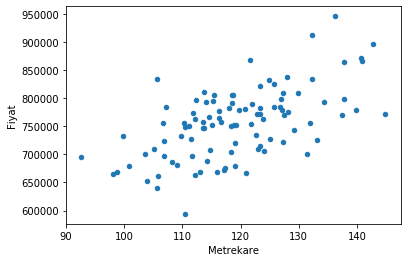

In [5]:
df.plot(x ='Metrekare', y='Fiyat', kind = 'scatter')

In [6]:
import math
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 


def costfunc(h, y):
    cost = (1/(2*len(y))) * np.sum(np.square(h-y))
    return cost


def hypothesis(theta0,theta1,x):
#for a single feature. if more than one feature, 
#then I think this function needs to be changed
    h = theta0+theta1*x
    return h

def normalization(x):
    mean = np.mean(x)
    stddev = np.std(x)
    x_norm = (x - mean) / stddev
    return x_norm,mean,stddev

def gradient_descent(x,y,theta0=0,theta1=0,alpha=0.0001,iter=100):
    n = len(x)
    err = []
    models = []
    for i in range(0,iter):
        for j in range(len(x)):
            h = hypothesis(theta0, theta1, x[j])
            theta0 = theta0 - alpha*(np.sum(h-y[j]))/n #derivative
            theta1 = theta1 - alpha*((h-y[j]) * (x[j]))/n #x ile carpilmasi gerek theta1 oldugu icin
        models.append([theta0, theta1])
        h = hypothesis(theta0, theta1, x)
        cost = costfunc(h,y)
        err.append(cost) 
    return theta0,theta1,err,models


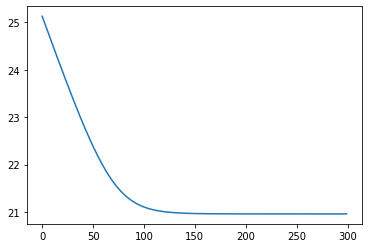

In [7]:
x = df['Metrekare'].to_numpy() 
y = df['Fiyat'].to_numpy()
theta0 = rd.randint(200000,500000)
theta1 = rd.randint(1000,3000)
learning_rate = 0.03 
iterations = 300
theta0_opt = 755645 #348023
theta1_opt = 36573 #3421.4
x_norm,mean, stdev = normalization(x)
theta0,theta1,err, models = gradient_descent(x_norm,y,theta0,theta1,learning_rate,iterations)
#theta0,theta1,err, models = gradient_descent(x,y,theta0,theta1,learning_rate,iterations)
y_optimal = hypothesis(theta0_opt,theta1_opt, x)
y_bg = hypothesis(theta0, theta1, x_norm)
cost_opt = costfunc(y_optimal,y)
cost_bg = costfunc(y_bg, y)

plt.plot([math.log(e) for e in err]) 
plt.show()



MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


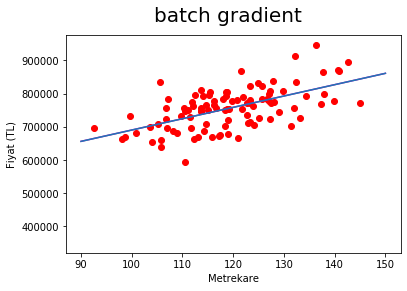

In [10]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
fig, ax = plt.subplots()
fig.suptitle('batch gradient', fontsize=20)
ax.set_xlabel('Metrekare')
ax.set_ylabel('Fiyat (TL)')
ax.scatter(x, y, color='red')
#ax.plot(x,y_optimal,color='m')
x_all = np.array((list(range(90,151))))
x_all_norm = np.array(([(a - mean)/stdev for a in range(90,151)]))

ax.plot(x_all, hypothesis(theta0_opt, theta1_opt, x_all_norm), color = 'm')

line, = ax.plot(x_all, hypothesis(models[0][0], models[0][1], x_all_norm))
def animate(i):
    line.set_ydata(hypothesis(models[i][0], models[i][1], x_all_norm))  # update the data.
    return line,

ani = animation.FuncAnimation(fig, animate, interval=100, blit=True, save_count=len(models))
ani.save(r'C:\Users\U090167\Desktop\Risk\Python\data.gif')